In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Histogram equalization in images

## Black & White

Image shape:  (427, 640)


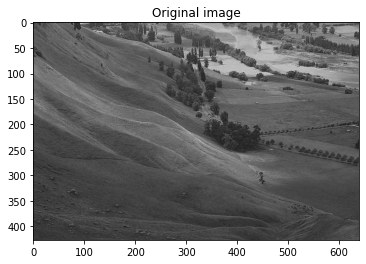

In [2]:
image = plt.imread('datasets/640px-Unequalized_Hawkes_Bay_NZ.jpg')
plt.imshow(image, 'gray')
plt.title('Original image')
print('Image shape: ', image.shape)
plt.show()

In [3]:
pixels = image.flatten()
pixels.shape

(273280,)

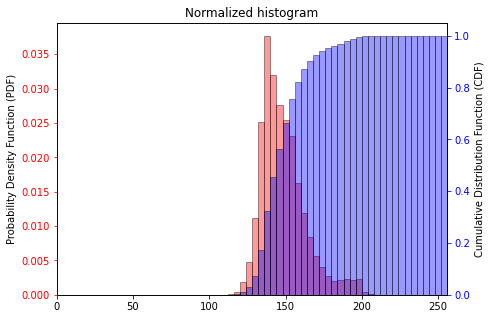

In [4]:
plt.figure(figsize=(7, 5))
pdf = plt.hist(pixels, bins=64, range=(0, 256), density=True,
         color='red', alpha=0.4, edgecolor='black')
plt.xlim((0, 255))
plt.ylabel('Probability Density Function (PDF)')
plt.title('Normalized histogram')
plt.tick_params('y', color='red', labelcolor='red')

plt.twinx()
plt.xlim((0,256))
plt.tick_params('y', color='blue', labelcolor='blue')
plt.ylabel('Cumulative Distribution Function (CDF)')
cdf, bins, patches = plt.hist(pixels, bins=64, range=(0, 256), density=True, cumulative=True,
         color='blue', alpha=0.4, edgecolor='black')

plt.show()

In [5]:
print('cdf shape: ', cdf.shape)
print('bins shape: ', bins.shape)

cdf shape:  (64,)
bins shape:  (65,)


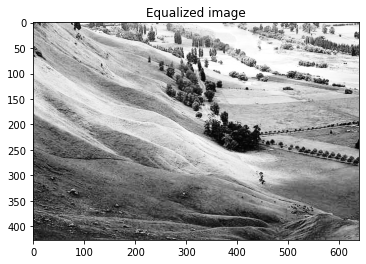

In [6]:
new_pixels = np.interp(pixels, bins[:-1], cdf*255)
new_image = new_pixels.reshape(image.shape)
plt.title('Equalized image')
plt.imshow(new_image, 'gray')
plt.show()

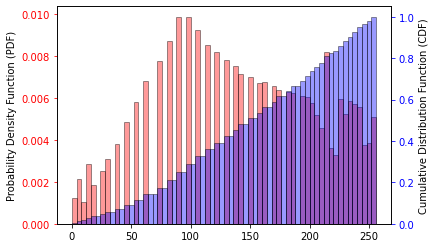

In [7]:
plt.hist(new_pixels, bins=64, range=(0, 256), density=True,
         color='red', alpha=0.4, edgecolor='black')
plt.ylabel('Probability Density Function (PDF)')
plt.tick_params('y', color='red', labelcolor='red')

plt.twinx()
plt.hist(new_pixels, bins=64, range=(0, 256), density=True, cumulative=True,
        color='blue', alpha=0.4, edgecolor='black')
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.tick_params('y', color='blue', labelcolor='blue')

plt.show()

## In colour

Image shape:  (200, 200, 3)


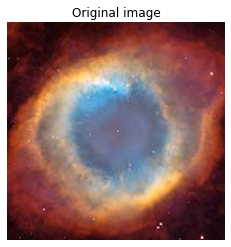

In [8]:
image = plt.imread('datasets/hs-2004-32-b-small_web.jpg')

plt.title('Original image')
plt.axis('off')
plt.imshow(image)
print('Image shape: ', image.shape)
plt.show()

In [9]:
# Extract 2-D arrays of the RGB channels: red, green, blue
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
green_pixels = green.flatten()
blue_pixels = blue.flatten()

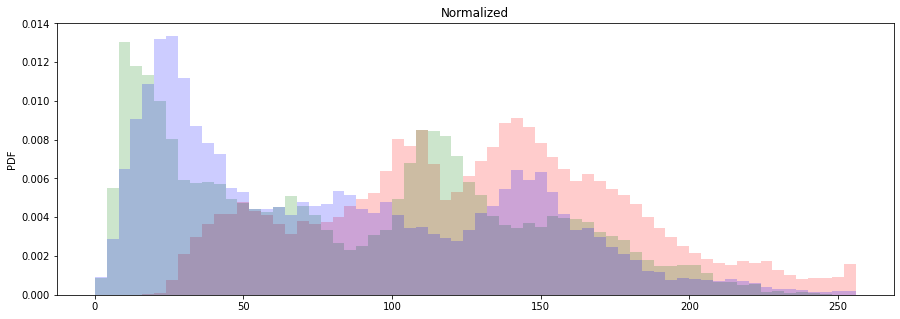

In [10]:
plt.figure(figsize=(15, 5))
plt.hist(red_pixels, bins=64, range=(0, 256), density=True, color='red', alpha=0.2)
plt.hist(green_pixels, bins=64, range=(0, 256), density=True, color='green', alpha=0.2)
plt.hist(blue_pixels, bins=64, range=(0, 256), density=True, color='blue', alpha=0.2)
plt.ylabel('PDF')
plt.title('Normalized')
plt.show()

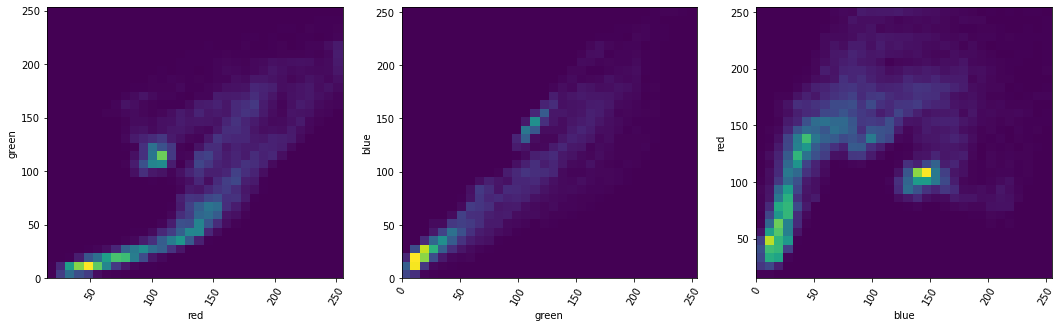

In [11]:
plt.figure(figsize=(18, 5))

# Generate a 2-D histogram of the red and green pixels
plt.subplot(1,3,1)
plt.grid('off') 
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(red_pixels, green_pixels, bins=(32,32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(1,3,2)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(green_pixels, blue_pixels, bins=(32,32))

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(1,3,3)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(blue_pixels, red_pixels, bins=(32,32))

# Display the plot
plt.show()